Nowadays Video On Demand (VOD) business has it's own golden period. Netflix popularity highly raised during last few years. For sure, this is one of leading VOD platforms. What is the strategy of a big-player in face of achieved success?

The goal of this analysis is to answer questions about current netflix strategy. Questions:
* [1. Is Netflix more into TV series or movies?](#chapter1)
* [2. What categories are being released to netflix the most often?](#chapter2)
* [3. Are the new titles being available rather than the old ones?](#chapter3)
* [4. Is it true netflix is trying new TV shows rather then continue the old ones?](#chapter4)
* [5. Conclusions](#chapter5)

You can click the question to move to the chapter. (This option is not working directly on the github.)

In [1]:
#importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading data
data = pd.read_csv("netflix_titles.csv")

In [3]:
#checking data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#change date field to date type
data['date_added'] = pd.to_datetime(data['date_added'])

In [6]:
#drop columns that won't be used
data.drop(['show_id', 'cast'], axis = 1, inplace=True)

In [7]:
#check date ranges
print("Min date:", data['date_added'].min())
print("Max date:",data['date_added'].max())

Min date: 2008-01-01 00:00:00
Max date: 2021-09-25 00:00:00


In [8]:
#choose only last 5 year data - older are not important
mask = (data['date_added'] >= '2017-01-01')
data = data[mask]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8230 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8230 non-null   object        
 1   title         8230 non-null   object        
 2   director      5829 non-null   object        
 3   country       7422 non-null   object        
 4   date_added    8230 non-null   datetime64[ns]
 5   release_year  8230 non-null   int64         
 6   rating        8227 non-null   object        
 7   duration      8229 non-null   object        
 8   listed_in     8230 non-null   object        
 9   description   8230 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 707.3+ KB


# Is netflix more into TV series or movies? <a class="anchor" id="chapter1"></a>

C:\Users\bast3\AppData\Local\Temp/ipykernel_1628/2087013183.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt1.show()


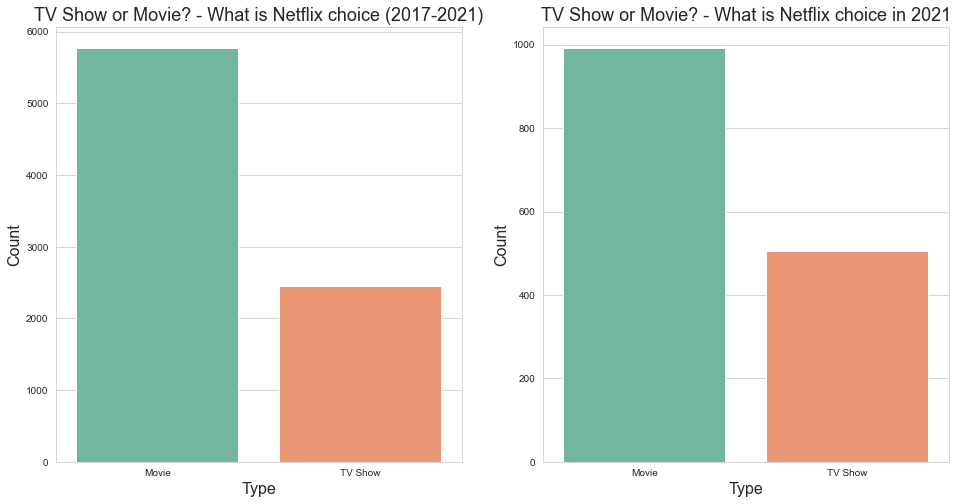

In [10]:
sns.set_style("whitegrid")
plt1, [ax1, ax2] = plt.subplots(1,2, figsize = (16, 8))

sns.countplot(data = data, x = 'type', palette = 'Set2', ax = ax1)
ax1.set_title("TV Show or Movie? - What is Netflix choice (2017-2021)", fontsize = 18)
ax1.set_xlabel("Type", fontsize = 16)
ax1.set_ylabel("Count", fontsize = 16)

#choose only last year data
mask_2021 = (data['date_added'] >= '2021-01-01')
data_2021_only = data[mask_2021]

sns.countplot(data = data_2021_only, x = 'type', palette = 'Set2', ax = ax2)
ax2.set_title("TV Show or Movie? - What is Netflix choice in 2021", fontsize = 18)
ax2.set_xlabel("Type", fontsize = 16)
ax2.set_ylabel("Count", fontsize = 16)
plt1.show()

In [11]:
#calculate % part for TV show and movie:
movie_since_2017 = data[data['type'] == 'Movie']['type'].count()
tv_show_since_2017 = data[data['type'] == 'TV Show']['type'].count()
total_since_2017 = movie_since_2017 + tv_show_since_2017
movie_2021 = data_2021_only[data_2021_only['type'] == 'Movie']['type'].count()
tv_show_2021 = data_2021_only[data_2021_only['type'] == 'TV Show']['type'].count()
total_2021 = movie_2021 + tv_show_2021

print(f"Since year 2017 movies were {round(movie_since_2017 * 100/total_since_2017, 1)}% of all released productions into Netflix platform so TV shows have {round(tv_show_since_2017 * 100/total_since_2017, 1)}%.")
print(f"In 2021 movie-tv show ratio is {round(movie_2021 * 100/total_2021, 1)}% for movies to {round(tv_show_2021 * 100/total_2021, 1)}% for TV shows.")

Since year 2017 movies were 70.2% of all released productions into Netflix platform so TV shows have 29.8%.
In 2021 movie-tv show ratio is 66.3% for movies to 33.7% for TV shows.


In [12]:
#group by time and date to get number of movies/TV series introduced in time
by_type_in_time = data[['type', 'date_added', 'title']].groupby(by = ['type', 'date_added']).count()

In [13]:
by_type_in_time.reset_index(inplace=True)

C:\Users\bast3\AppData\Local\Temp/ipykernel_1628/3627434119.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt2.show()


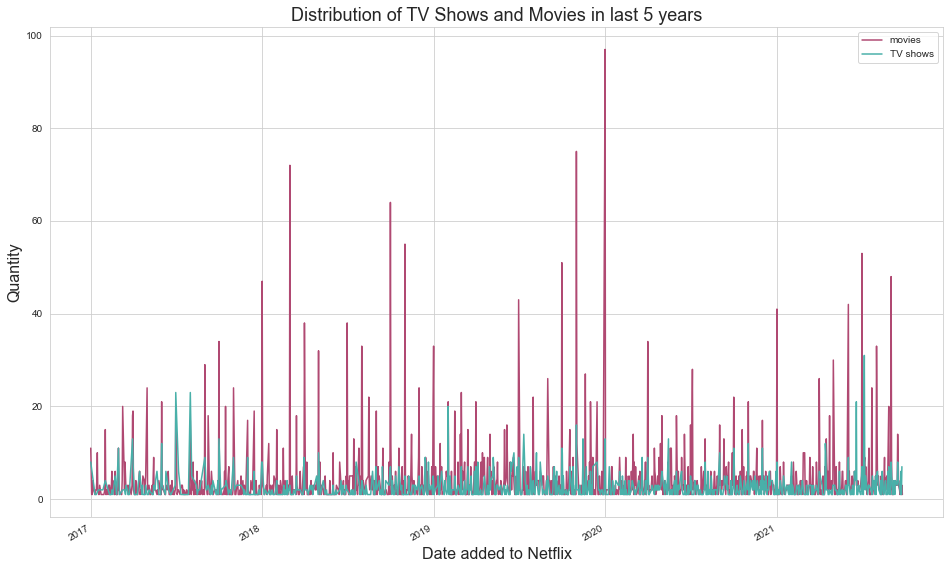

In [14]:
plt2, ax = plt.subplots(1,1, figsize = (16, 10))

by_type_in_time[by_type_in_time['type'] == 'Movie'].plot(x = 'date_added', y = 'title', ax=ax, label = 'movies', color = '#B04972')
by_type_in_time[by_type_in_time['type'] == 'TV Show'].plot(x = 'date_added', y = 'title', ax=ax, label = 'TV shows', color = '#49B0A9')

ax.set_title("Distribution of TV Shows and Movies in last 5 years", fontsize = 18)
ax.set_xlabel("Date added to Netflix", fontsize = 16)
ax.set_ylabel("Quantity", fontsize = 16)
plt2.show()


# What  categories are being released to netflix the most often? <a class="anchor" id="chapter2"></a>

In [15]:
#extract categories
data[['category_1', 'category_2', 'category_3']] = data['listed_in'].str.split(',', expand=True)

In [16]:
#melt df - push categories to one column 
melted_categories = pd.melt(data, id_vars=['type', 'title', 'director', 'country', 'date_added', 'release_year',
                                           'rating', 'duration', 'description'], 
                            value_vars=['category_1', 'category_2', 'category_3'],
                            value_name = 'category')

melted_categories.drop('variable', axis=1, inplace=True)

In [17]:
melted_categories.head()

,type,title,director,country,date_added,release_year,rating,duration,description,category
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries
1,TV Show,Blood & Water,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows
2,TV Show,Ganglands,Julien Leclercq,NaN,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",Docuseries
4,TV Show,Kota Factory,NaN,India,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,International TV Shows


In [18]:
#Standardize categories for TV shows and movies
#removes 'TV show' and 'Movies' from category name to standardize them both for movies and TV shows
melted_categories['category'] = melted_categories['category'].str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '')
#clean from whitespaces
melted_categories['category'] = melted_categories['category'].str.strip()

#drop blank from category
melted_categories = melted_categories[melted_categories['category'] != '']

In [19]:
#count productions per categories
category_qty = melted_categories[['category', 'title']].groupby(by='category').count().sort_values(by='title', ascending=False)
category_qty.reset_index(inplace=True)

In [20]:
#select top 10 categories
top_10_cat = category_qty[:10]

C:\Users\bast3\AppData\Local\Temp/ipykernel_1628/1584613496.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt4.show()


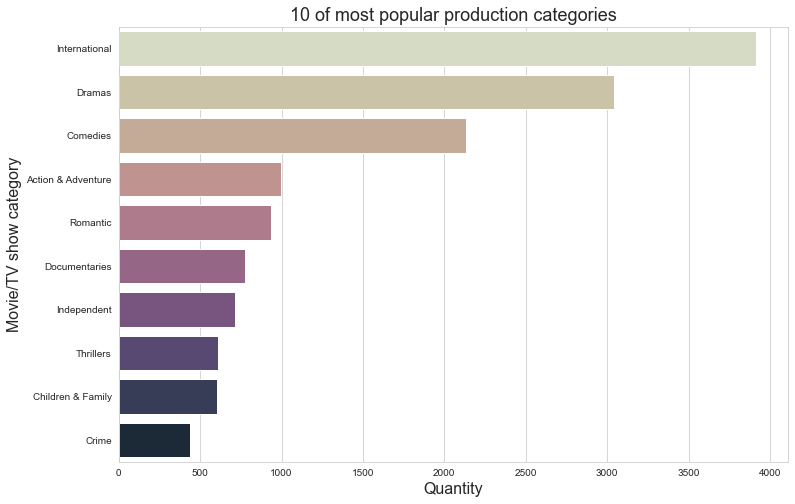

In [21]:
plt4, ax = plt.subplots(1, 1, figsize = (12, 8))

sns.barplot(data = top_10_cat, x = 'title', y = 'category', palette = 'ch:s=-.7,r=.9')
ax.set_title("10 of most popular production categories", fontsize = 18)
ax.set_xlabel("Quantity", fontsize = 16)
ax.set_ylabel("Movie/TV show category", fontsize = 16)
plt4.show()

C:\Users\bast3\AppData\Local\Temp/ipykernel_1628/1053375432.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt5.show()


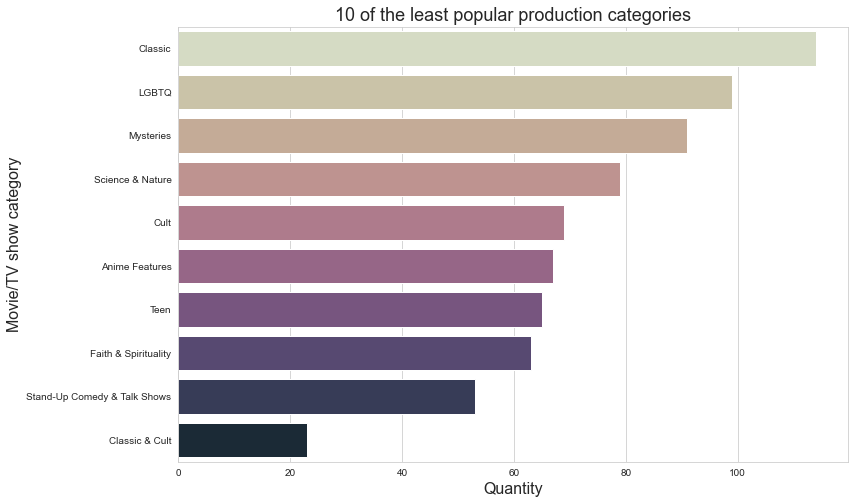

In [22]:
#select lower 10 categories
low_10_cat = category_qty[-10:]

plt5, ax = plt.subplots(1, 1, figsize = (12, 8))

sns.barplot(data = low_10_cat, x = 'title', y = 'category', palette = 'ch:r=.9,s=-.7')
ax.set_title("10 of the least popular production categories", fontsize = 18)
ax.set_xlabel("Quantity", fontsize = 16)
ax.set_ylabel("Movie/TV show category", fontsize = 16)
plt5.show()

# Are the new titles being available rather than the old ones? <a class="anchor" id="chapter3"></a> 

In [23]:
#calculate year added - release year
data['age'] = pd.DatetimeIndex(data['date_added']).year - data['release_year'] 

In [24]:
#create groups by age
by_age = data[['title', 'age']].groupby(by='age').count()
by_age.reset_index(inplace = True)

In [25]:
by_age

,age,title
0,-1,11
1,0,2975
2,1,1472
3,2,683
4,3,475
...,...,...
68,73,3
69,74,3
70,75,2
71,76,1


In [26]:
#what are the titles with age "-1"?
data[data['age'] == -1]

,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,category_1,category_2,category_3,age
1551,TV Show,Hilda,NaN,"United Kingdom, Canada, United States",2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",Kids' TV,None,None,-1
1696,TV Show,Polly Pocket,NaN,"Canada, United States, Ireland",2020-11-15,2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...,Kids' TV,None,None,-1
2920,TV Show,Love Is Blind,NaN,United States,2020-02-13,2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...,Reality TV,Romantic TV Shows,None,-1
3168,TV Show,Fuller House,NaN,United States,2019-12-06,2020,TV-PG,5 Seasons,TV Comedies,The Tanner family’s adventures continue as DJ ...,TV Comedies,None,None,-1
3287,TV Show,Maradona in Mexico,NaN,"Argentina, United States, Mexico",2019-11-13,2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon...",Docuseries,Spanish-Language TV Shows,None,-1
3369,TV Show,BoJack Horseman,NaN,United States,2019-10-25,2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...,TV Comedies,None,None,-1
3433,TV Show,The Hook Up Plan,NaN,France,2019-10-11,2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her...",International TV Shows,Romantic TV Shows,TV Comedies,-1
4844,TV Show,Unbreakable Kimmy Schmidt,NaN,United States,2018-05-30,2019,TV-14,4 Seasons,TV Comedies,When a woman is rescued from a doomsday cult a...,TV Comedies,None,None,-1
4845,TV Show,Arrested Development,NaN,United States,2018-05-29,2019,TV-MA,5 Seasons,TV Comedies,It's the Emmy-winning story of a wealthy famil...,TV Comedies,None,None,-1
5394,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Netherlands,2017-07-01,2018,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...,Stand-Up Comedy,None,None,-1


In [27]:
#Change age -1 to 0
data['age'] = data['age'].apply(lambda x: 0 if x == -1 else x)

C:\Users\bast3\AppData\Local\Temp/ipykernel_1628/1634582768.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt3.show()


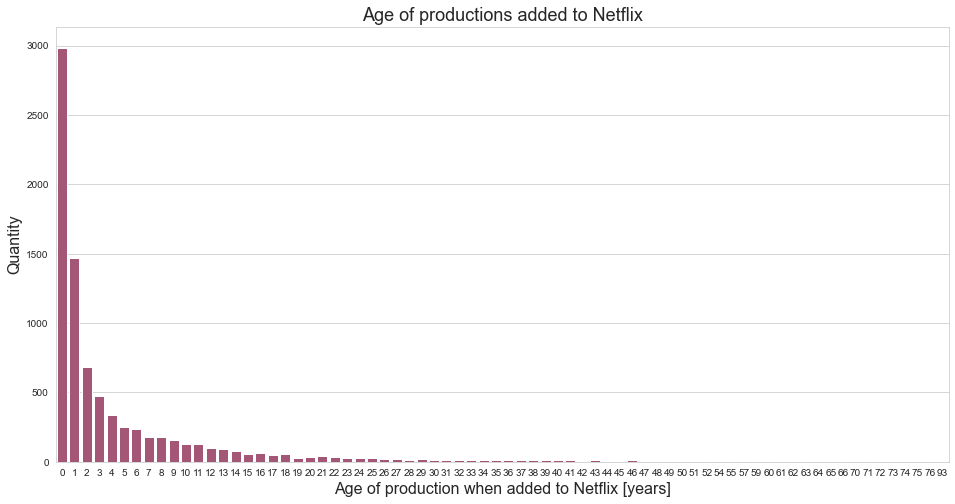

In [28]:
plt3, ax = plt.subplots(1,1, figsize = (16, 8))

sns.countplot(data = data, x = 'age', ax=ax, color = '#B04972')
ax.set_title("Age of productions added to Netflix", fontsize = 18)
ax.set_xlabel("Age of production when added to Netflix [years]", fontsize = 16)
ax.set_ylabel("Quantity", fontsize = 16)
plt3.show()

# Is it true netflix is trying new TV shows rather then continue the old ones? <a class="anchor" id="chapter4"></a>

In [29]:
#select only TV shows
TV_shows = data[data['type'] == 'TV Show']

C:\Users\bast3\AppData\Local\Temp/ipykernel_1628/264233320.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt6.show()


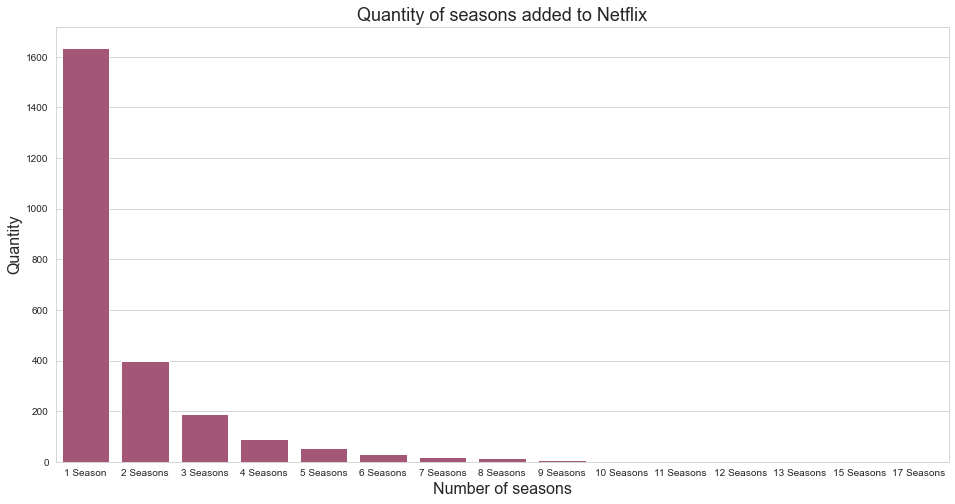

In [30]:
plt6, ax = plt.subplots(1,1, figsize = (16, 8))

sns.countplot(data = TV_shows, x = 'duration', ax=ax, color = '#B04972', order = ['1 Season', '2 Seasons', '3 Seasons', 
                                                                                  '4 Seasons', '5 Seasons', '6 Seasons', 
                                                                                  '7 Seasons', '8 Seasons', '9 Seasons', 
                                                                                  '10 Seasons', '11 Seasons', '12 Seasons',
                                                                                  '13 Seasons', '15 Seasons', '17 Seasons'])
ax.set_title("Quantity of seasons added to Netflix", fontsize = 18)
ax.set_xlabel("Number of seasons", fontsize = 16)
ax.set_ylabel("Quantity", fontsize = 16)
plt6.show()

# Conclusions  <a class="anchor" id="chapter5"></a>

Based on 8230 productions released to Netflix since 2017 Netflix strategy is based rather on movies than TV shows, but we can observe that since 2020 the amount of movies is lower than in previous years with the benefit to TV shows. Within the most popular production categories we can find: international productions, dramas and comedies. Classic & Cult are placed on the lowest position just behind the Stand Up Comedy & Talk Shows. Netflix is open to the newest productions. Older movies and TV Shows are rather rare exceptions. It is true that Netflix tends to add to the available titles only the 1st season of TV shows because there's 4 times more 1st seasons in compare to 2nd seasons.